In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

In [2]:
df = pd.read_csv('marketing.csv')
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


# Data Preparation

In [4]:
# Notice that the data columns 'date_served', 'date_subscribed', 'data_canceled' are recognized as object data type. 
# Let's re-import the dataset and convert them to datetime64 types so that we can analyse chronologically. 
df = pd.read_csv('marketing.csv', parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


In [6]:
# Some entries have null values. Let's print them out and see if we can remove them.
df[df['date_served'].isnull() == True]

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
7038,a100004504,NaT,House Ads,personalization,False,English,English,19-24 years,NaT,NaT,NaN,NaN
9944,a10009231,NaT,NaN,control,NaN,English,English,19-24 years,NaT,NaT,NaN,NaN
9945,a10009232,NaT,NaN,control,NaN,English,English,24-30 years,NaT,NaT,NaN,NaN
9946,a10009233,NaT,NaN,control,NaN,English,English,30-36 years,NaT,NaT,NaN,NaN
9947,a10009234,NaT,NaN,control,NaN,English,English,36-45 years,NaT,NaT,NaN,NaN
9948,a10009235,NaT,NaN,control,NaN,English,English,45-55 years,NaT,NaT,NaN,NaN
9949,a10009236,NaT,NaN,control,NaN,English,English,55+ years,NaT,NaT,NaN,NaN
9950,a10009237,NaT,NaN,control,NaN,English,English,0-18 years,NaT,NaT,NaN,NaN
9951,a10009238,NaT,NaN,control,NaN,English,English,19-24 years,NaT,NaT,NaN,NaN
9952,a10009239,NaT,NaN,control,NaN,English,English,24-30 years,NaT,NaT,NaN,NaN


In [7]:
# We don't know when these ads were served, via what channel, and whether converted. 
# They have no value for further analysis. We can drop them. 
df.dropna(subset=['date_served'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10021 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10021 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10021 non-null  object        
 3   variant              10021 non-null  object        
 4   converted            10021 non-null  object        
 5   language_displayed   10021 non-null  object        
 6   language_preferred   10021 non-null  object        
 7   age_group            10021 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 1017.8+ KB


In [9]:
# Notice that 'converted' column is recognised as object. Let's change it to boolean. 
df['converted'] = df['converted'].astype('bool')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10021 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10021 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10021 non-null  object        
 3   variant              10021 non-null  object        
 4   converted            10021 non-null  bool          
 5   language_displayed   10021 non-null  object        
 6   language_preferred   10021 non-null  object        
 7   age_group            10021 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: bool(1), datetime64[ns](3), object(8)
memory usage: 949.3+ KB


In [11]:
# let's check if a single user has been served multiple times
df['user_id'].nunique()

7294

In [12]:
# Yes, some users have been served more than once. 
# Let's print out a detailed table to see how many users have been served twice, thrice ...
serve_count = df['user_id'].value_counts() 
serve_count = serve_count.to_frame().reset_index()
serve_count = serve_count.groupby('user_id').count()
serve_count.index.name = 'Total Reach'
serve_count.columns = ['Total Users']
serve_count

,Total Users
Total Reach,
1,5014
2,2059
3,126
4,62
5,13
8,2
10,17
12,1


In [13]:
# When users have been exposed to the same ad multiple times, although via different channels, 
# they are more likely to convert. To be consistent across all the users, we will consider the conversion rate 
# only on their first impression. 
df = df.sort_values(['user_id','date_served']).drop_duplicates('user_id')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7294 entries, 2380 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              7294 non-null   object        
 1   date_served          7294 non-null   datetime64[ns]
 2   marketing_channel    7294 non-null   object        
 3   variant              7294 non-null   object        
 4   converted            7294 non-null   bool          
 5   language_displayed   7294 non-null   object        
 6   language_preferred   7294 non-null   object        
 7   age_group            7294 non-null   object        
 8   date_subscribed      1020 non-null   datetime64[ns]
 9   date_canceled        350 non-null    datetime64[ns]
 10  subscribing_channel  1020 non-null   object        
 11  is_retained          1020 non-null   object        
dtypes: bool(1), datetime64[ns](3), object(8)
memory usage: 690.9+ KB


<AxesSubplot:xlabel='language_preferred'>

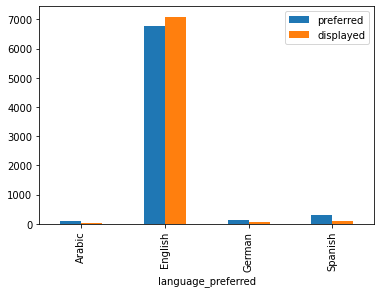

In [15]:
# Note that there are 'language_displayed' and 'language_preferred' columns. 
# Let's see if everyone has been served the language they preferred. 
language_split = df.groupby('language_preferred')['user_id'].count()
language_split = language_split.to_frame()
language_split['displayed'] = df.groupby('language_displayed')['user_id'].count()
language_split.columns = ['preferred', 'displayed']
language_split.plot(kind='bar')

In [16]:
# Serving the wrong language will affect conversion. 
# Here we only consider those who have been served the correct one, and consider English speakers only.
df = df[(df['language_displayed'] == 'English') & (df['language_preferred'] == 'English')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6756 entries, 2380 to 9995
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              6756 non-null   object        
 1   date_served          6756 non-null   datetime64[ns]
 2   marketing_channel    6756 non-null   object        
 3   variant              6756 non-null   object        
 4   converted            6756 non-null   bool          
 5   language_displayed   6756 non-null   object        
 6   language_preferred   6756 non-null   object        
 7   age_group            6756 non-null   object        
 8   date_subscribed      888 non-null    datetime64[ns]
 9   date_canceled        302 non-null    datetime64[ns]
 10  subscribing_channel  888 non-null    object        
 11  is_retained          888 non-null    object        
dtypes: bool(1), datetime64[ns](3), object(8)
memory usage: 640.0+ KB


# Analysis

### Evaluate Reach

#### Overall

In [17]:
# Before analysing the results of AB test, it is necessary to check how many users have been reached in
# both control and personalization groups.

In [18]:
def Reach(dataframe, by_category):
    dataframe = dataframe.groupby([by_category,'variant'])['user_id'].nunique()
    return dataframe.unstack(level=1)

<AxesSubplot:xlabel='marketing_channel'>

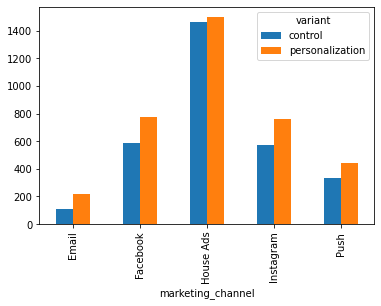

In [19]:
Reach(df, 'marketing_channel').plot(kind='bar')

In [20]:
# After calculating the lift, we will check if the sample size of each group is enough to detect the changes.
# Actually, it turns out that we don't have enough samples to test the email channel after using online calculator
# to work out the minimum required sample size.

#### Daily Reach

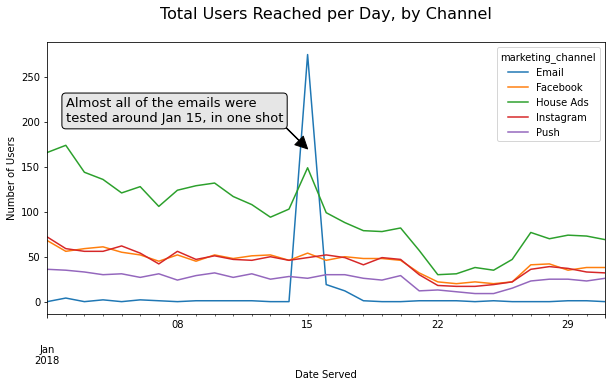

In [21]:
daily_reach_by_channel = df.groupby(['date_served','marketing_channel'])['user_id'].nunique()
daily_reach_by_channel = daily_reach_by_channel.unstack().fillna(0)
daily_reach_by_channel.plot(kind='line', 
                            #title='Total Users Reached per Day, by Channel\n',
                            ylabel='Number of Users',
                            xlabel='Date Served',
                            figsize=(10,5))
plt.title('Total Users Reached per Day, by Channel\n', fontsize=16)
plt.annotate('Almost all of the emails were\ntested around Jan 15, in one shot',
             fontsize='13',
             bbox=dict(boxstyle="round", fc="0.9", ec="black"),
             xy=(dt.datetime(2018,1,15),170),
             xytext=(dt.datetime(2018,1,2),200),
             arrowprops=dict(width=0.5, color='black'))
plt.savefig('Email.png')

In [22]:
# From the above result, we can see that almost all of the emails were tested around Jan 15, in one shot.

In [23]:
def daily_Reach(dataframe):
    dataframe = dataframe.groupby(['date_served','variant'])['user_id'].nunique()
    return dataframe.unstack()

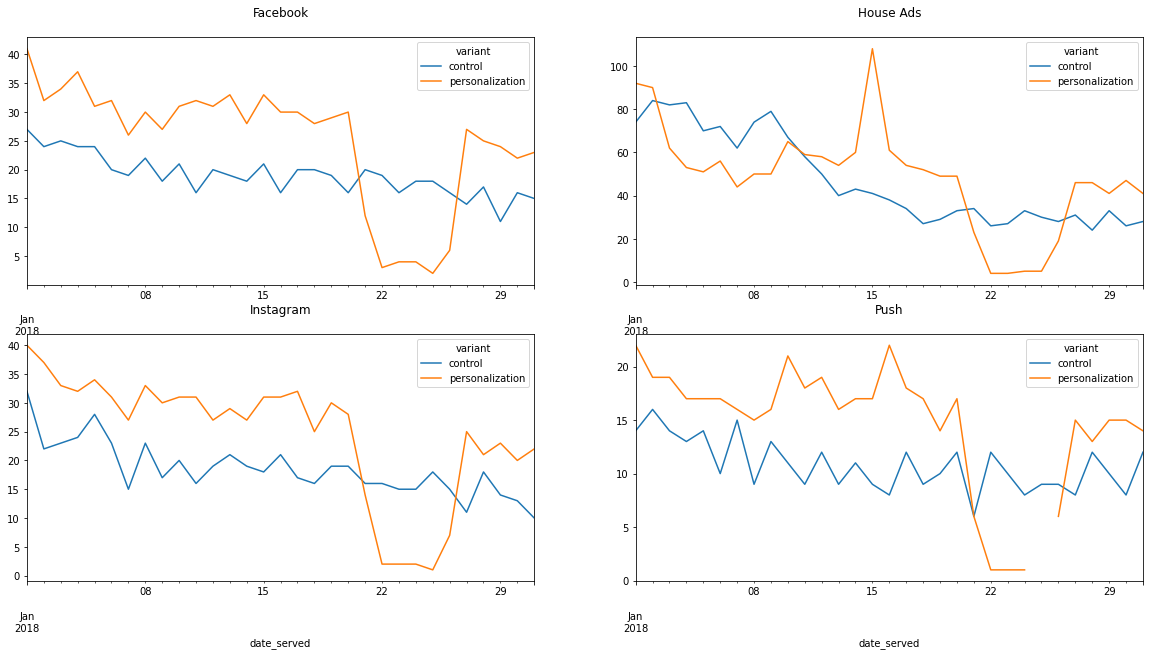

In [24]:
fig = plt.figure()

ax_F = fig.add_subplot(221)
ax_H = fig.add_subplot(222)
ax_I = fig.add_subplot(223)
ax_P = fig.add_subplot(224)

facebook = df[df.marketing_channel == 'Facebook']
house_ads = df[df.marketing_channel == 'House Ads']
instagram = df[df.marketing_channel == 'Instagram']
push = df[df.marketing_channel == 'Push']

daily_Reach(facebook).plot(kind='line', ax=ax_F, figsize=(20,10))
daily_Reach(house_ads).plot(kind='line', ax=ax_H, figsize=(20,10))
daily_Reach(instagram).plot(kind='line', ax=ax_I, figsize=(20,10))
daily_Reach(push).plot(kind='line', ax=ax_P, figsize=(20,10))

ax_F.set_title('Facebook\n')
ax_H.set_title('House Ads\n')
ax_I.set_title('Instagram\n')
ax_P.set_title('Push\n')

plt.show()

In [25]:
# From the results we have noticed a sudden drop of daily reach in all of the channels. 
# We will continue exploring and see if we can find the answer for this issue. 

### Conversion Rate

In [26]:
def CR(dataframe, by_category=None):
    if by_category is None:
        converted = dataframe[dataframe['converted'] == True].groupby('variant')['user_id'].nunique()
        total = dataframe.groupby('variant')['user_id'].nunique()
        
    else: 
        converted = dataframe[dataframe['converted'] == True].groupby([by_category, 'variant'])['user_id'].nunique()
        total = dataframe.groupby([by_category, 'variant'])['user_id'].nunique()
        converted = converted.unstack(level=1)
        total = total.unstack(level=1)
        
    return converted/total

In [27]:
CR(df)

variant
control            0.058420
personalization    0.090466
Name: user_id, dtype: float64

<AxesSubplot:xlabel='marketing_channel'>

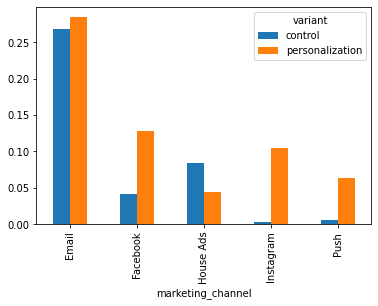

In [28]:
# Plot the conversion rates by channels to visually compare the two groups first 
CR(df, 'marketing_channel').plot(kind='bar')

In [29]:
def Lift(dataframe, by_category=None):
    if by_category is None:
        a = CR(dataframe).control
        b = CR(dataframe).personalization
        
    else:
        a = CR(dataframe, by_category).control
        b = CR(dataframe, by_category).personalization        
        
    return (b-a)/a

In [30]:
# overall lift
Lift(df)

0.5485331412627029

In [31]:
# conversion rates by channels
CR(df, 'marketing_channel')

variant,control,personalization
marketing_channel,,
Email,0.268519,0.284404
Facebook,0.040747,0.127413
House Ads,0.083562,0.044059
Instagram,0.003490,0.104222
Push,0.005988,0.063492


In [32]:
# lift by channels 
Lift(df, 'marketing_channel')

marketing_channel
Email         0.059158
Facebook      2.126931
House Ads    -0.472740
Instagram    28.859499
Push          9.603175
dtype: float64

In [33]:
def ABTest(channel, dataframe=None):
    if dataframe is None:
        dataframe = df
    
    a = dataframe[(dataframe['variant']=='control') & (dataframe['marketing_channel']==channel)].groupby('user_id')['converted'].max()
    b = dataframe[(dataframe['variant']=='personalization') & (dataframe['marketing_channel']==channel)].groupby('user_id')['converted'].max()
    
    t, p = stats.ttest_ind(a, b)
    
    return p

In [34]:
ABTest('Email')

0.764322975856785

In [35]:
# creating a summary table which includes all the useful calculations
def Summary():
    reach = Reach(df, 'marketing_channel')
    cr = CR(df, 'marketing_channel')
    lift = Lift(df, 'marketing_channel')
    
    df_out = pd.concat([reach, cr, lift], axis=1, keys=['Reach','Conversion Rate', 'Lift'])
    df_out['p-value'] = df_out.index.values
    df_out['p-value'] = df_out['p-value'].apply(ABTest)
    
    df_out.columns = [['Reach','Reach','Conversion Rate', 'Conversion Rate', 'Lift', 'p-value'], 
                      ['Control','Personalization','Control', 'Personalization', "", ""]]
    df_out.index.names = ['']
    
    df_out['Conversion Rate', 'Control'] = df_out['Conversion Rate', 'Control'].apply(lambda x: 
                                                                                      str(round(x*100,2))+"%")
    df_out['Conversion Rate', 'Personalization'] = df_out['Conversion Rate', 'Personalization'].apply(lambda x: 
                                                                                      str(round(x*100,2))+"%")
    df_out['Lift'] = df_out['Lift'].apply(lambda x: str(round(x*100,2))+"%")
    
    return df_out

In [36]:
Summary()

Reach                 Conversion Rate                      Lift  \
          Control Personalization         Control Personalization             
                                                                              
Email         108             218          26.85%          28.44%     5.92%   
Facebook      589             777           4.07%          12.74%   212.69%   
House Ads    1460            1498           8.36%           4.41%   -47.27%   
Instagram     573             758           0.35%          10.42%  2885.95%   
Push          334             441            0.6%           6.35%   960.32%   

                p-value  
                         
                         
Email      7.643230e-01  
Facebook   2.572620e-08  
House Ads  1.041834e-05  
Instagram  1.482141e-14  
Push       3.697329e-05

### Daily Conversion Rate

In [37]:
def daily_CR(dataframe):
    df_out = dataframe.groupby(['date_served', 'variant'])['converted'].mean()
    return df_out.unstack()

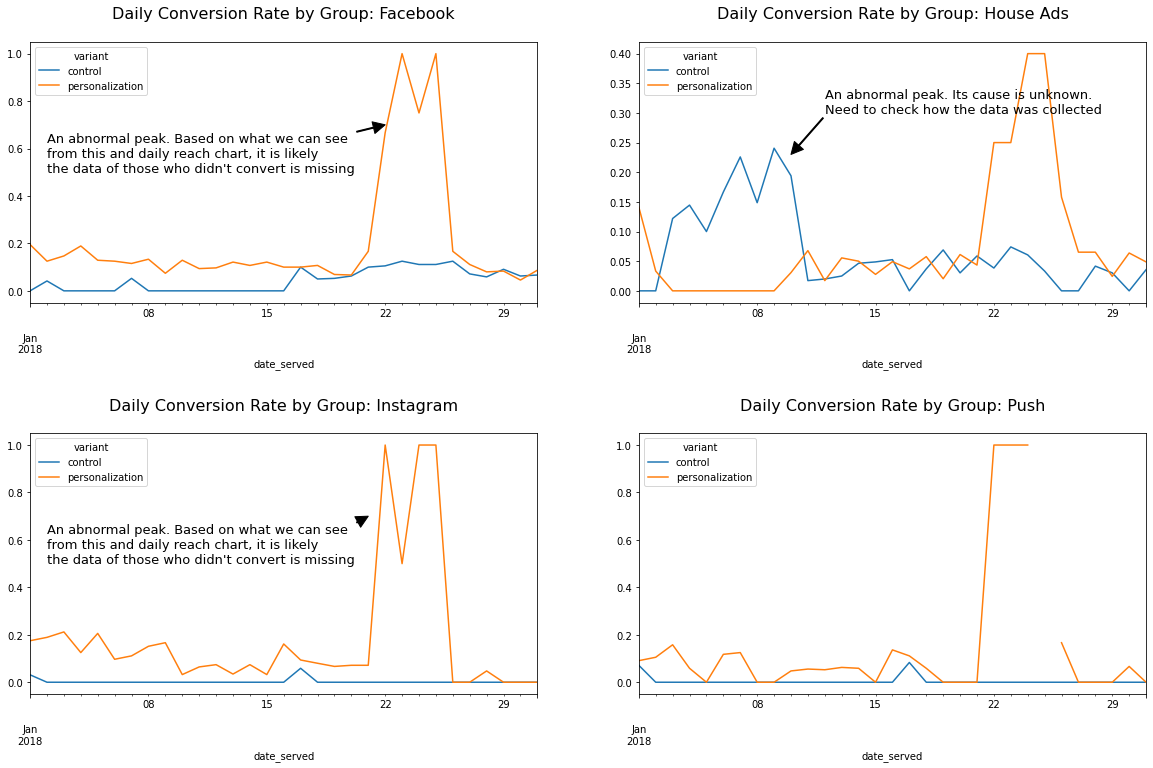

In [38]:
fig = plt.figure()

ax_F = fig.add_subplot(221)
ax_H = fig.add_subplot(222)
ax_I = fig.add_subplot(223)
ax_P = fig.add_subplot(224)

plt.subplots_adjust(hspace=0.5)

daily_CR(facebook).plot(kind='line', ax=ax_F, figsize=(20,12))
daily_CR(house_ads).plot(kind='line', ax=ax_H, figsize=(20,12))
daily_CR(instagram).plot(kind='line', ax=ax_I, figsize=(20,12))
daily_CR(push).plot(kind='line', ax=ax_P, figsize=(20,12))

ax_F.set_title('Daily Conversion Rate by Group: Facebook\n', fontsize=16)
ax_H.set_title('Daily Conversion Rate by Group: House Ads\n', fontsize=16)
ax_I.set_title('Daily Conversion Rate by Group: Instagram\n', fontsize=16)
ax_P.set_title('Daily Conversion Rate by Group: Push\n', fontsize=16)

ax_F.annotate('An abnormal peak. Based on what we can see\nfrom this and daily reach chart, it is likely\nthe data of those who didn\'t convert is missing',
              color='black',
              fontsize='13',
              xy=(dt.datetime(2018,1,22),0.7), 
              xytext=(dt.datetime(2018,1,2),0.5),
              arrowprops=dict(color='black', width=1))

ax_I.annotate('An abnormal peak. Based on what we can see\nfrom this and daily reach chart, it is likely\nthe data of those who didn\'t convert is missing',
              color='black',
              fontsize='13',
              xy=(dt.datetime(2018,1,21),0.7), 
              xytext=(dt.datetime(2018,1,2),0.5),
              arrowprops=dict(color='black', width=1))

ax_H.annotate('An abnormal peak. Its cause is unknown.\nNeed to check how the data was collected',
              color='black',
              fontsize='13',
              xy=(dt.datetime(2018,1,10),0.23), 
              xytext=(dt.datetime(2018,1,12),0.3),
              arrowprops=dict(color='black', width=1))

plt.show()

In [39]:
# Let's look at the dates between Jan 1 and Jan 20, see how the results going to change

In [40]:
df = df[df['date_served'] <= dt.datetime(2018,1,20)]

In [41]:
Summary().loc[['Facebook', 'House Ads', 'Instagram', 'Push']]

Reach                 Conversion Rate                      Lift  \
          Control Personalization         Control Personalization             
                                                                              
Facebook      409             625           1.71%           12.0%   601.14%   
House Ads    1140            1217           9.74%           3.62%   -62.87%   
Instagram     412             619           0.49%          11.47%  2262.84%   
Push          230             354           0.87%            6.5%   647.18%   

                p-value  
                         
                         
Facebook   1.616475e-09  
House Ads  1.837443e-09  
Instagram  1.023896e-11  
Push       9.988605e-04